In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('60.csv')

In [3]:
df.columns = ['key', 'htArr', 'pressArr', 'releaseArr']
df = df[(df['key'].str.match(r'^[a-zA-Z]$'))]
htArr = df['htArr'].values  # Tiempos de mantenimiento de teclas (hold time)
pressArr = df['pressArr'].values  # Tiempos en los que las teclas fueron presionadas
print(htArr)
print()
print(pressArr)

[0.071  0.1709 0.1048 0.1695 0.1255 0.0987 0.1697 0.0727 0.0788 0.0925
 0.1658 0.2033 0.1013 0.0683 0.0932 0.118  0.1303 0.1033 0.1315 0.13
 0.1201 0.0895 0.0994 0.115  0.0751 0.0784 0.1236 0.1545 0.1364 0.1541
 0.1138 0.1524 0.1586 0.0686 0.0819 0.0738 0.093  0.1294 0.0776 0.1371
 0.1522 0.0996 0.1213 0.1326 0.1044 0.0937 0.1105 0.0643 0.1544 0.1315
 0.0979 0.1101 0.1589 0.1315 0.0881 0.1214 0.172  0.104  0.0948 0.1398
 0.1234 0.1258 0.1394 0.1189 0.0763 0.0581 0.1151 0.0885 0.1287 0.0742
 0.1433 0.1012 0.1042 0.2136 0.1253 0.14   0.1495 0.0687 0.1572 0.0707
 0.0991 0.1416 0.1822 0.0545 0.09   0.1334 0.1175 0.1374 0.0986 0.131
 0.1242 0.1226 0.0527 0.1313 0.1255 0.1618 0.1455 0.1618 0.1254 0.1167
 0.1048 0.0861 0.1192 0.0781 0.1762 0.0831 0.0825 0.1068 0.1667 0.181
 0.1057 0.1888 0.082  0.1705 0.0705 0.1457 0.1295 0.1157 0.0992 0.16
 0.2213 0.0862 0.1711 0.088  0.0829 0.1693 0.1389 0.136  0.151  0.1745
 0.0666 0.1248 0.0717 0.1469 0.1894 0.0685 0.1084 0.1008 0.1178 0.1969
 0.1436 0.11

In [4]:

def plotRawHT(pressArrIn, htArrIn):
    winSize = 50  # Incrementos de 50 en el eje X
    lblfSize = 14  # Tamaño de las etiquetas de los ejes

    # Crear la figura
    plt.figure(figsize=(10, 6))
    plt.ion()

    # Graficar los puntos (momento de pulsación vs. tiempo de mantenimiento)
    plt.plot(pressArrIn, htArrIn, 'o', color='blue', label='Hold Time')

    # Configurar los límites del gráfico
    plt.ylim(0, max(htArrIn) * 1.1)  # Limitar el eje Y a un 10% por encima del valor máximo
    plt.xticks(range(0, int(np.max(pressArrIn)) + winSize, winSize))  # Incrementos de 50 en X

    # Etiquetas de los ejes
    plt.xlabel('tiempo', fontsize=lblfSize)
    plt.ylabel('Hold Time (seconds)', fontsize=lblfSize)

    # Mostrar el gráfico
    plt.legend()
    plt.grid(True)
    plt.show()

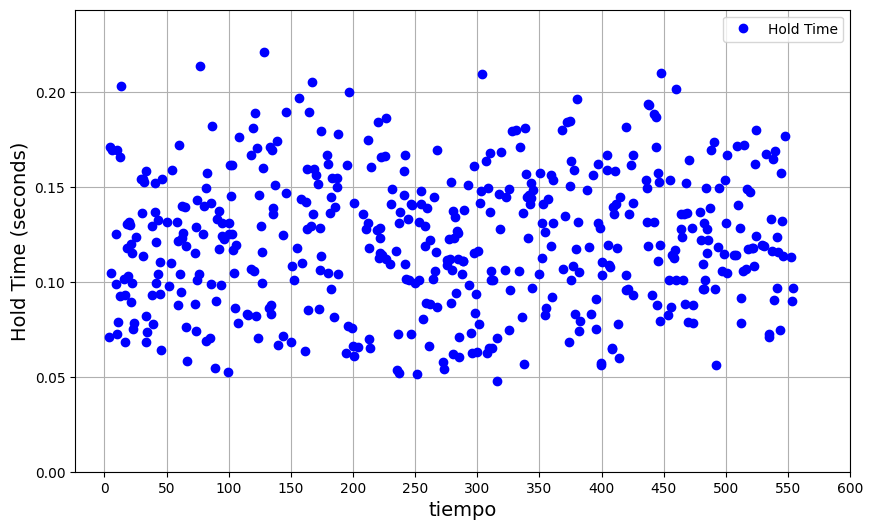

In [5]:
plotRawHT(pressArr, htArr)

In [6]:
fig = px.scatter(
    df,
    x='pressArr',   # Eje X: tiempo en el que se presionó la tecla
    y='htArr',      # Eje Y: tiempo de mantenimiento de la tecla
    hover_name='key',  # Mostrar la tecla presionada al pasar el mouse
    labels={'pressArr': 'Time of Key Press (seconds)', 'htArr': 'Hold Time (seconds)'},
    title='Tiempo de mantenimiento de las teclas'
)

# Configurar el rango de ticks del eje X en incrementos de 50
fig.update_layout(xaxis=dict(tickmode='linear', tick0=0, dtick=50))
